<a href="https://colab.research.google.com/github/mitacrane/capstone1/blob/main/capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Investment Data Exploration
## Mita Crane

The dataset includes data for property sales in Washington state in 2014,
likely derived from data published by the Washington Center for Real Estate Research.

##Columns and Data Types

Sale Date: Temporal - Date when property was sold (May-July 2014)

Price: Numerical (Continuous ratio) - Sale price of the property in USD

Year Built: Numerical (Discrete) - Year when the property was constructed

Year Renovated: Numerical (Discrete) - Year when property was last renovated

Bedrooms: Numerical (Discrete) - Number of bedrooms in the property

Bathrooms: Numerical (Discrete) - Number of bathrooms (can include decimals)

Floors: Numerical (Discrete) - Number of floors in the property

Sqft Living: Numerical (Continuous ratio) - Square footage of the living area

Sqft Lot: Numerical (Continuous ratio) - Square footage of the property lot

View Rating: Categorical (Ordinal) - Rating of the property's view quality

Condition Rating: Categorical (Ordinal) - Rating of the property's condition

Waterfront: Binary - Whether property faces a waterfront (yes/no)

Sqft Above: Numerical (Continuous ratio) - Square footage of above-ground living area

Sqft Basement: Numerical (Continuous ratio) - Square footage of the basement

Address: Categorical (Nominal) - Street address of the property

City: Categorical (Nominal) - City where the property is located

Zipcode: Categorical (Nominal) - Postal code of the property

Country: Categorical (Nominal) - Country where the property is located

In [11]:



# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import io
import zipfile

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Download the dataset using kagglehub
print("Attempting to download the dataset from Kaggle...")

try:
    # Using kagglehub to download the dataset
    import kagglehub
    # Download latest version
    path = kagglehub.dataset_download("fratzcan/usa-house-prices")
    print("Path to dataset files:", path)

    # Find the CSV file in the downloaded directory
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    if csv_files:
        csv_path = os.path.join(path, csv_files[0])
        print(f"Found CSV file: {csv_files[0]}")
        df = pd.read_csv(csv_path)
        print("Dataset successfully loaded from Kaggle")
    else:
        raise FileNotFoundError("No CSV file found in the downloaded dataset")

except Exception as e:
    print(f"Could not download from Kaggle directly: {str(e)}")




Attempting to download the dataset from Kaggle...
Path to dataset files: /root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1
Found CSV file: USA Housing Dataset.csv
Dataset successfully loaded from Kaggle


Based on the detailed statistics provided, here's an updated and revised summary:

The dataset spans May-July 2014 (69 days total) and reveals an average home price of 553,063 (range: 0-26.59M) with extreme right-skew (24.76), indicating predominantly moderate-priced homes with few luxury properties. Most properties (99.25%) lack waterfront access, making this a premium feature. Typical homes have 3 bedrooms (mode), 2.5 bathrooms (mode), 1,980 sq ft living space (median), and 7,676 sq ft lots (median). The majority of homes (62.7%) are rated condition 3 out of 5, with 26.9% in better condition (4-5 rating). Construction dates range from 1900-2014 (median: 1976), with homes most commonly built in 2005. The price per square foot averages 265.84. Seattle dominates the market with 34.2% of listings, followed by Renton, Bellevue, and Redmond. Living areas show moderate right-skew (1.46), while lot sizes display extreme variation (skewness: 11.78).

In [19]:
# Define column types manually for appropriate analysis
continuous_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'Price_Per_SqFt']
discrete_cols = ['bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated'] # Removed 'year', 'month'
ordinal_cols = ['view', 'condition']
nominal_cols = ['street', 'city', 'statezip', 'country']
binary_cols = ['waterfront']
date_cols = ['date']

# Calculate Price_Per_SqFt after loading the dataframe
df['Price_Per_SqFt'] = df['price'] / df['sqft_living']

# Convert date column to datetime if it isn't already
if 'date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

    # Extract year and month if they are not already present in the DataFrame
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    #Now include year and month to discrete_cols
    discrete_cols.extend(['year', 'month'])

# 1. Summary statistics for continuous numerical variables
print("Summary Statistics for Continuous Numerical Variables:")
continuous_stats = df[continuous_cols].describe()
print(continuous_stats)

# 2. Summary statistics for discrete numerical variables
print("\nSummary Statistics for Discrete Numerical Variables:")
discrete_stats = df[discrete_cols].describe()
print(discrete_stats)

# 3. Additional statistics for numerical variables (both continuous and discrete)
numerical_cols = continuous_cols + discrete_cols
additional_stats = pd.DataFrame(index=numerical_cols)
additional_stats['range'] = df[numerical_cols].apply(lambda x: x.max() - x.min())
additional_stats['mode'] = df[numerical_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
additional_stats['skewness'] = df[numerical_cols].apply(lambda x: x.skew())
additional_stats['kurtosis'] = df[numerical_cols].apply(lambda x: x.kurtosis())

print("\nAdditional Statistics for Numerical Variables:")
print(additional_stats)

# 4. Statistics for ordinal categorical variables
print("\nStatistics for Ordinal Variables:")
for col in ordinal_cols:
    print(f"\nDistribution of {col}:")
    value_counts = df[col].value_counts().sort_index()
    print(value_counts)
    print(f"Median {col}: {df[col].median()}")
    print(f"Mode {col}: {df[col].mode()[0]}")

# 5. Statistics for nominal categorical variables
print("\nStatistics for Nominal Variables:")
for col in nominal_cols:
    print(f"\nTop 10 most frequent values for {col}:")
    print(df[col].value_counts().head(10))
    print(f"Total unique values: {df[col].nunique()}")
    print(f"Mode (most common) {col}: {df[col].mode()[0]}")

# 6. Statistics for binary variables
print("\nStatistics for Binary Variables:")
for col in binary_cols:
    print(f"\nDistribution of {col}:")
    counts = df[col].value_counts()
    print(counts)
    percentages = 100 * counts / len(df)
    print("Percentages:")
    print(percentages)

# 7. Temporal analysis for date columns
if len(date_cols) > 0 and 'date' in df.columns:
    print("\nTemporal Analysis:")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Total timespan: {(df['date'].max() - df['date'].min()).days} days")

    # Analyze distribution by month
    df['month_name'] = df['date'].dt.month_name()
    monthly_counts = df['month_name'].value_counts().sort_index()
    print("\nDistribution by month:")
    print(monthly_counts)

Summary Statistics for Continuous Numerical Variables:
              price   sqft_living      sqft_lot   sqft_above  sqft_basement  Price_Per_SqFt
count  4.140000e+03   4140.000000  4.140000e+03  4140.000000    4140.000000     4140.000000
mean   5.530629e+05   2143.638889  1.469764e+04  1831.351449     312.287440      265.840195
std    5.836865e+05    957.481621  3.587684e+04   861.382947     464.349222      375.082789
min    0.000000e+00    370.000000  6.380000e+02   370.000000       0.000000        0.000000
25%    3.200000e+05   1470.000000  5.000000e+03  1190.000000       0.000000      180.390803
50%    4.600000e+05   1980.000000  7.676000e+03  1600.000000       0.000000      243.567489
75%    6.591250e+05   2620.000000  1.100000e+04  2310.000000     602.500000      315.145707
max    2.659000e+07  10040.000000  1.074218e+06  8020.000000    4820.000000    22533.898305

Summary Statistics for Discrete Numerical Variables:
          bedrooms    bathrooms       floors     yr_built  yr_r

In [15]:
# ### 2.2 Identifying Missing Values

# %%
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a dataframe to display both count and percentage of missing values
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Display only columns with missing values
missing_data = missing_data[missing_data['Missing Count'] > 0]

if not missing_data.empty:
    print("Columns with missing values:")
    missing_data
else:
    print("No missing values found in the dataset.")

# %% [markdown]
# ### Strategies for Handling Missing Values:
#
# Based on our analysis of missing data, we propose the following strategies:
#
# 1. **For Missing Renovation Years (Yr_Renovated)**: Many properties have never been renovated, which is likely represented as 0 or NaN. We'll convert any NaN values to 0 to indicate "no renovation."
#
# 2. **For Missing Numerical Data**:
#    - **For Sqft_Basement**: We can impute using the difference between Sqft_Living and Sqft_Above, or with 0 if the property doesn't have a basement.
#    - **For other measurements**: We can use the median value for the neighborhood or property type, as this will be less affected by outliers than the mean.
#
# 3. **For Missing Categorical Data**:
#    - We can use the mode (most frequent value) for the same property type or neighborhood.
#    - For view or condition ratings with missing values, we can use the median rating as a conservative estimate.
#
# 4. **For Properties with Excessive Missing Data**:
#    - If a property is missing more than 50% of its attributes, we might consider removing it from the analysis if the dataset is large enough.

# %%
# Let's implement some of these strategies
# Example: Convert any NaN values in Yr_Renovated to 0
if 'Yr_Renovated' in df.columns:
    df['Yr_Renovated'] = df['Yr_Renovated'].fillna(0)

# For demonstration: Impute missing values in numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        print(f"Imputing missing values in {col} with median")
        df[col] = df[col].fillna(df[col].median())

# For demonstration: Check if there are still missing values after imputation
still_missing = df.isnull().sum()
still_missing = still_missing[still_missing > 0]
if not still_missing.empty:
    print("\nColumns still containing missing values after basic imputation:")
    print(still_missing)
else:
    print("\nNo missing values remain after imputation.")










Error calculating key insights: 'Price'
Please check that the column names in your dataset match those in the code.
Your dataset contains these columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country', 'Price_Per_SqFt']
No missing values found in the dataset.

No missing values remain after imputation.


The price-related visualizations reveal key patterns about home valuations. The
histogram of house prices shows a strong positive skew, with most properties
concentrated in the lower to middle price ranges and a long tail of high-priced
properties, typical of real estate markets where luxury properties command significant
premiums. The boxplot identifies several significant outliers in the price distribution,with a few properties valued above 10 million, and at least one property approaching $30 million. The boxplot by city shows substantial variation in median prices
across the top 5 cities, with Bellevue appearing to have both the highest median prices
and the most expensive outlier properties, while Kent shows lower median prices with fewer
outliers. Seattle and Redmond also have high median prices, reflecting their desirable
locations. The scatter plot shows a positive relationship between living area and price,
though with considerable variability, suggesting other factors significantly influence
pricing beyond just size.
The boxplot shows that properties in better condition (4-5 rating) command higher median
prices, with condition 4 properties showing the widest price range and some of the
highest-priced outliers, confirming the value of property condition in determining market
value. The relationship between bedrooms and price isn't strictly linear - while 3-bedroom
homes generally cost more than 2-bedroom homes, the highest-priced outliers appear in the
3-bedroom category rather than in homes with more bedrooms, suggesting that other factors
(location, quality, lot size) may be more important than simply maximizing bedroom count.




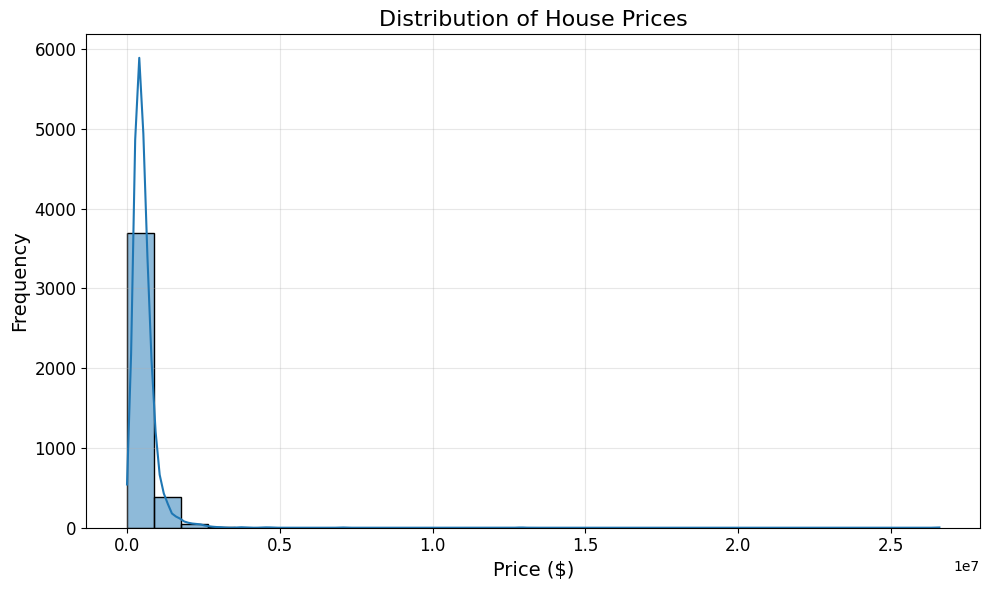

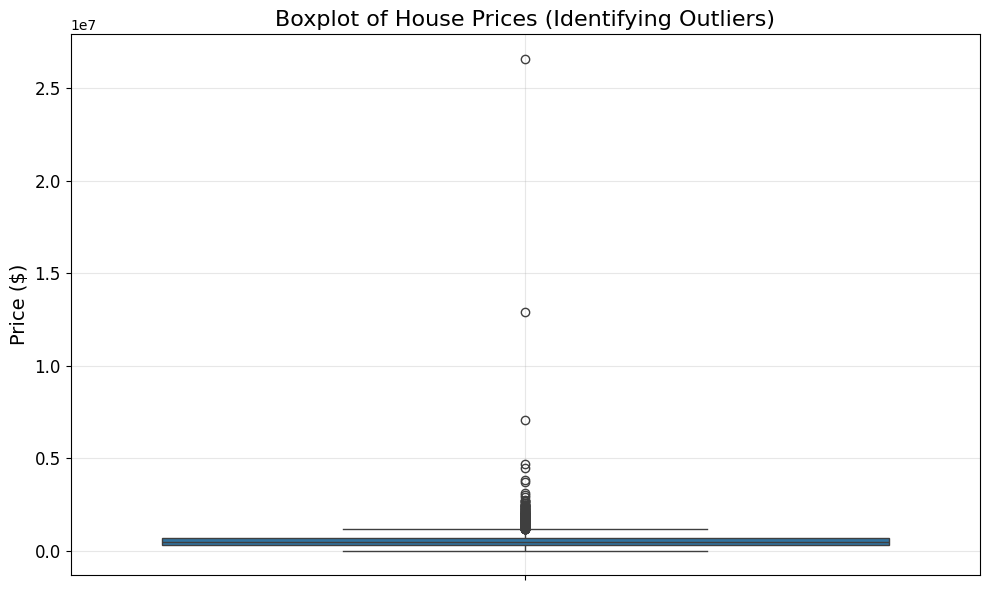

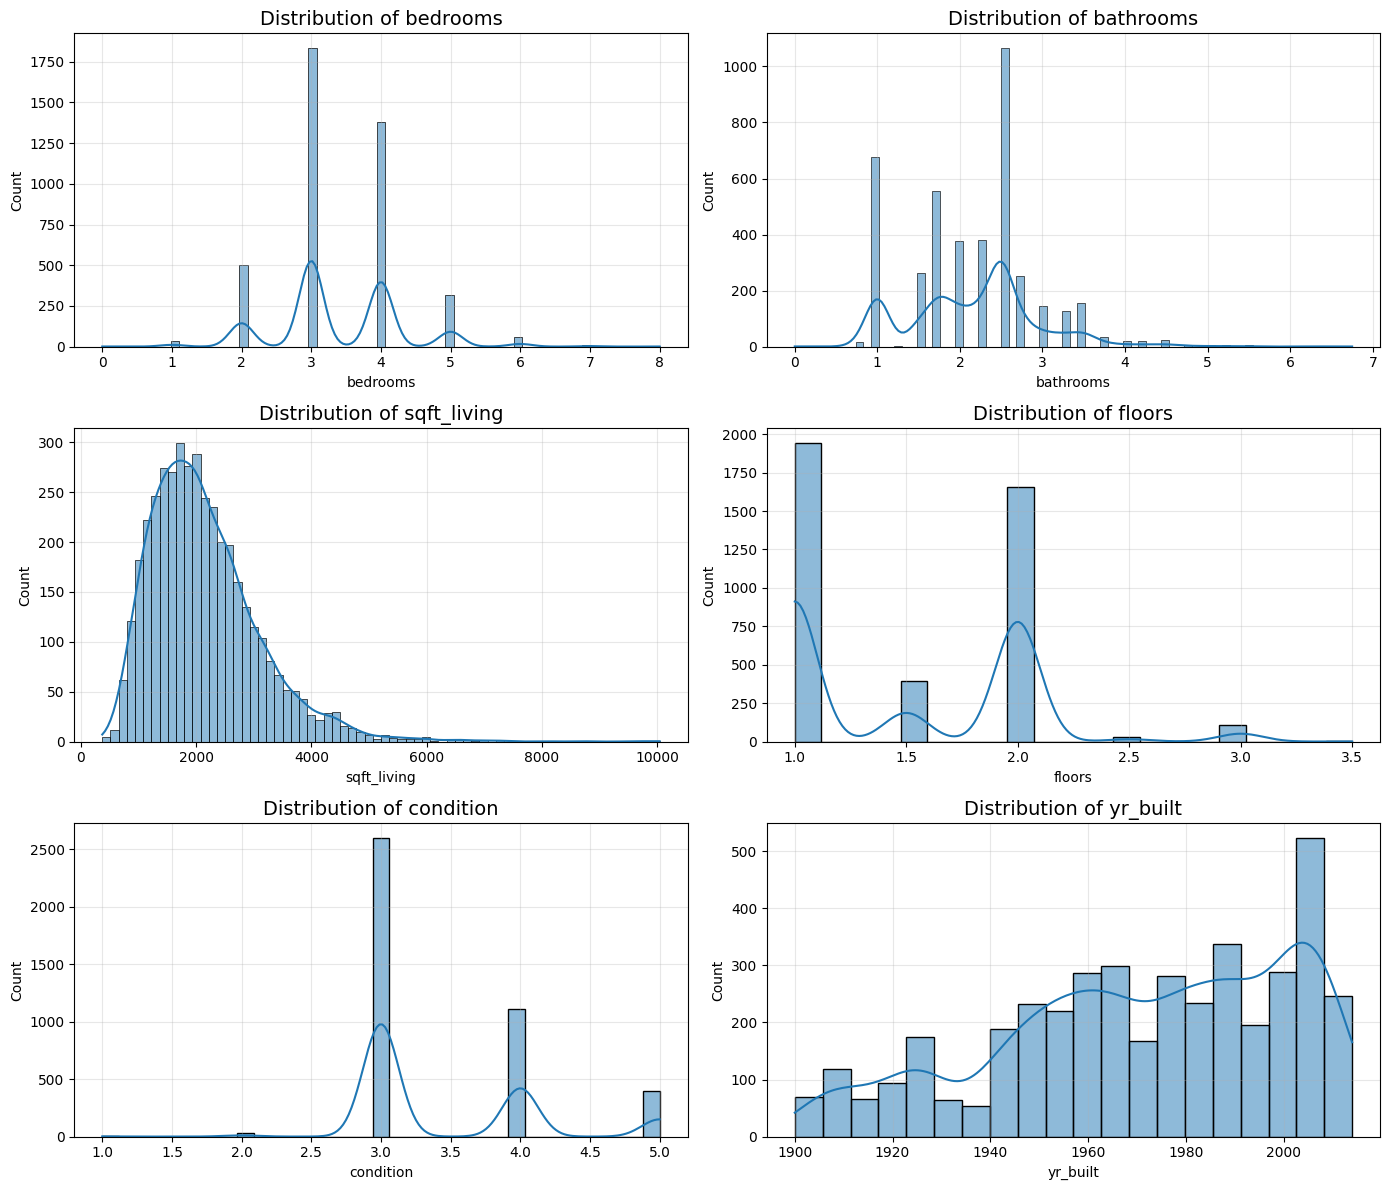

NameError: name 'city_price_data' is not defined

<Figure size 1400x600 with 0 Axes>

In [8]:
# %% [markdown]
# #### 2.3.1 Price Distribution

# %%
# Create a histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Create a boxplot of house prices to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot of House Prices (Identifying Outliers)', fontsize=16)
plt.ylabel('Price ($)', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.6 Feature Distribution Analysis

# %%
# Create a grid of histograms for key numerical features
key_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'yr_built']
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# %% [markdown]



# %%
# Compare price per square foot across cities
plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='Price_Per_SqFt', data=city_price_data, order=top_5_cities)
plt.title('Price per Square Foot by City (Top 5 Cities)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price per Square Foot ($/sqft)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Waterfront has a positive correlation with price (0.13) and view (0.36), confirming that
waterfront properties command a premium and tend to have better views. The year built shows
moderate positive correlations with bathrooms (0.47) and floors (0.47), indicating newer
homes tend to have more bathrooms and more floors. Interestingly, yr_built has a weak
correlation with price (0.03), suggesting that age alone isn't a strong driver of price.
Year renovated shows negative correlations with most features, including a -0.32 correlation
with year built, which makes sense as older homes are more likely to be
renovated than newer ones. However, renovations don't show a strong
correlation with price (only -0.03). Surprisingly, sqft_lot has a very weak
correlation with price (0.05), suggesting that the size of the land isn't as
important as the size of the home in determining value in this market.

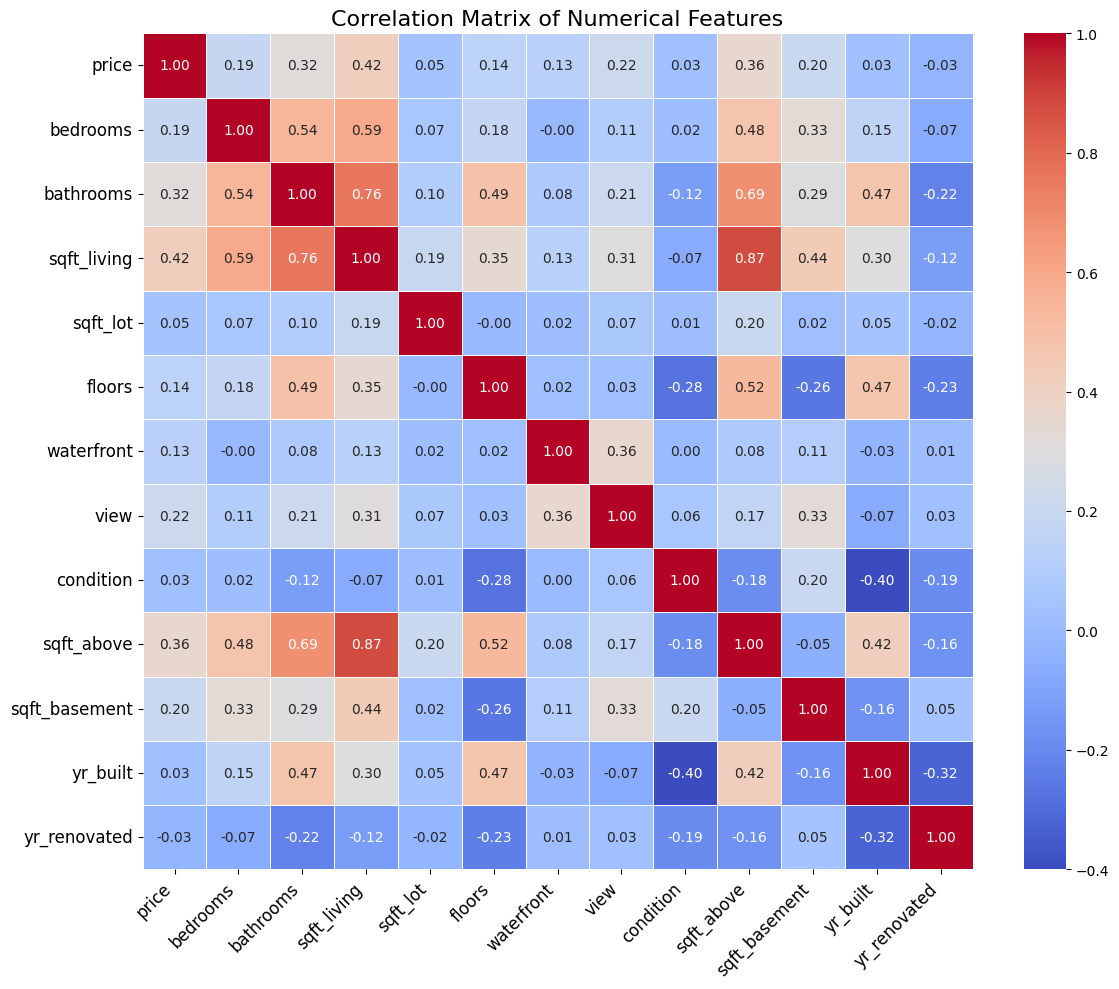

In [9]:
# %% [markdown]
# #### 2.3.5 Correlation Analysis

# %%
# Calculate correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# New Section